# NOTEBOOK 12 Euler's method for solving differential equations
---

## Theoretical introduction to Euler's method

Many physical processes are of such complexity that the final state of the system can not (easily) be analytically calculated from the initial state of the system. As an example we consider the vertical drop of an object that experiences drag. From a certain height $h$ we drop an object of a given mass $m$. Because of the air, the ball will experience a drag force $F_w$ that depends on the velocity of the ball according to: 

$$ F_w = k \rho v^2 $$

, with $\rho$ the air density and $k$ some constant depending on the cross-sectional surface and drag coefficient of the object and $v$ the velocity. In addition to the drag force we have of course the gravitational force $F_g = mg$, with $g$ the gravitational acceleration. With this we can write down the differential equation that needs to be solved:

$$ m \frac{d^2h}{dt^2} = F_g + F_w$$

and since the velocity $v$ is the time derivative of $h$ with respect to $t$ we can rewrite this second order differential equation as two first order equations for reasons that will become clear soon:

$$ \begin{cases}
 & \frac{dv}{dt} = a = \frac{1}{m}(F_w+F_g) \\ 
 & \frac{dh}{dt} = v
\end{cases} $$

, with $a$ the acceleration of the object. Solving the equations is relatively straight forward in simple cases, but quickly becomes impossible if things become more complicated (e.g. if the drag force depends on the velocity and/or height). In order to still be able to solve the problem we make use of a numeric approach: *Euler's method*. 

In Euler's method changes in parameters (like position, velocity and acceleration) are evaluated for very small steps in time (e.g. 1/100 or 1/1000 of a second). During these steps we assume that the forces are constant. This allows to calculate for each time step the change in acceleration, change in velocity and change in position. Because of the many steps that need to be evaluated, typically this calculation is done by a computer. 

Based on the two differential equations we can write Euler's process as:

$$ \begin{cases}
 & v(t+\Delta t) = v(t) + a(t) \Delta t\\ 
 & h(t+\Delta t) = h(t) + v(t) \Delta t
\end{cases} $$

So, given some initial values for $v$ and $h$ we can compute the change in velocity as $a(t) \Delta t$ and just add it to the current velocity to get the velocity $v(t+\Delta t)$ at the next time step. Same for the height.  

>Note: Euler's method is simple, but not very efficient in terms of computational time. Normally quite small time steps are required to obtain enough accuracy. There exist more efficient algorithms to numerically solve differential equations. You will learn those later in the bachelor program.



## A Python implementation to get you started

To get you started a working implementation of Euler's method is provided that considers the problem of a falling object in a gravitational field with drag.

In [92]:
"""
script to calculate a vertical drop with drag using Euler's method
Note that the implementation is written for clarity of Euler's method
and not for optimized execution speed!
"""

m = 10            # mass [kg]
g = -9.81         # gravitational accelaration [kg/m/s2]
k = 15.0          # constant related to drag [m2]
rho = 1.29        # air density [kg/m3]  

h0 = 40           # initial height [m]
v0 = 0            # initial velocity [m/s]
t0 = 0            # start time [s]
dt = 0.001        # time increments [s]

heights = [h0]    # init list for storing heights with start height
times = [t0]      # init list for storing timesteps with start time
velocities = [v0] # init list for storing velocities with start v


# perform Euler steps 
v, h, t = v0, h0, t0  # start with the initial parameters
while True:
    # compute the acceleration a
    Fz = m * g                # gravity
    Fw = k * rho * v**2       # drag
    Fres = Fz + Fw               
    a = Fres / m                 
    
    # update parameters using Euler's method
    h = h + v * dt
    v = v + a * dt    
    t = t + dt
    
    # check if we hit the surface
    if h <= 0:               
        break
    
    # store data for later analysis
    velocities.append(v)  
    heights.append(h)     
    times.append(t)         
    

The python script that performs the Euler method consists of four parts:

- Initialization of the variables (setting the start values). Note that also a list is defined that is used to store the values during the Euler steps. In this way the information (height, velocity) is not lost.
- A loop to run over all required time steps. Because we want to simulate until the object drops on the floor, we use a `while` loop because we do not know how many Euler steps are required.
- In the loop we calculate the acceleration and use that to update the values for the velocity and height. In addition we keep track of the time, which is not required for the Euler steps (only depends on the time step) but is convenient if you want to plot e.g. height or velocity versus time. 
- In the loop we check each time if the object already hit the ground. If so the `break` command is used to escape the loop. 

Finally, in each cycle of the loop the updated parameters are stored at the end of the lists.


---
**Assignment 11.1**

Try to understand the code above. Write code to plot the result in a figure with 2 subplots. The left plots height versus time, while the right plots velocity versus time.

Text(0, 0.5, 'velocity in m/s')

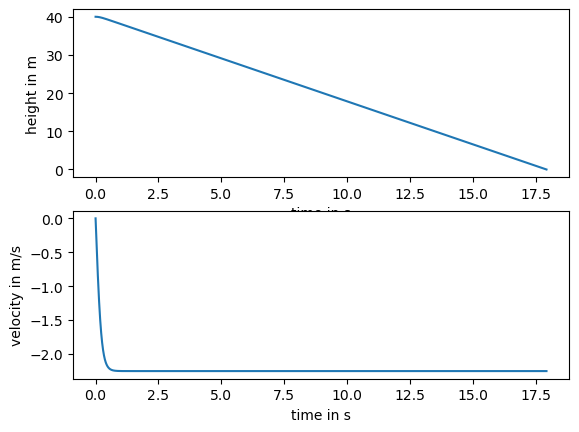

In [93]:
# =============== YOUR CODE GOES HERE =================
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

axs[0].plot(times, heights)
axs[0].set_xlabel("time in s")
axs[0].set_ylabel("height in m")
axs[1].plot(times, velocities)
axs[1].set_xlabel("time in s")
axs[1].set_ylabel("velocity in m/s")

---
**Assignment 11.2**

SANTA FE - October 14, 2012. The Austrian skydiver Felix Baumgartner set a world record by jumping from a height of about 39 km. He jumped from a space-capsule suspended from a balloon filled with Helium. During his free fall, Baumgartner reached a top speed of somewhere between 1300 and 1400 km/h. At a height of 500 m he opened his parachute and landed safely on the ground with a speed of 12 km/h.

See this youtube video for an impression: https://www.youtube.com/watch?v=Hz2F_S3Tl0Y

You will investigate the jump using the Euler method. You can make the following assumptions:

- The gravitational constant is 9.81 m/s $^2$

- The mass of Baumgartner is constant and equal to 250 kg (including all his equipment)

- The drag force is given by $F_w = k\rho v^2$, with $v$ is the velocity of Baumgartner, and $\rho$ the density of air

- The density of air is height dependend: $\rho(h)=1.29 \times (0.5)^{h/5500}$ , implying that the density is reduced by a factor of two every 5.5 km. (The numbers in the equation are all in SI-units)

- $k$ is a constant. For free fall $k=k_{free}=0.4 \text{ m}^2$ and with the parachute opened we have $k = k_{parachute}$.

- The parachute opens instantaneous. 


### Assignments:

1. Take/copy the example code in the code cell below and adapt the parameters to that of Baumgartner's jump. At this point we do not yet consider the parachute.
2. Determine the top speed reached during the free fall.
3. At a certain height (specified in the text above) Baumgartner opens his parachute. Implement this in your code. Determine the best values for $k_{parachute}$ with a precision of 1 m$^2$ (include a plot of velocity and height as function of time of this situation in your results document). You can find this value by simply trying different values for $k_{parachute}$ and evaluate the result.
4. Investigate how the time step `dt` influences the result of the simulation.


In [108]:
# =============== PERFORM THE SIMULATION =================

m = 250           # mass [kg]
g = -9.81         # gravitational acceleration [kg/m/s2]
k = 0.4          # constant related to drag [m2]
kp = 13

h0 = 39000           # initial height [m]
v0 = 0            # initial velocity [m/s]
t0 = 0            # start time [s]
dt = 0.500        # time increments [s]

heights = [h0]    # init list for storing heights with start height
times = [t0]      # init list for storing timesteps with start time
velocities = [v0] # init list for storing velocities with start v


# perform Euler steps 
v, h, t = v0, h0, t0  # start with the initial parameters
while True:
    # compute the acceleration a
    rho = 1.29 * 0.5 ** (h / 5500)        # air density [kg/m3]
    Fz = m * g                # gravity
    Fw = k * rho * v**2       # drag
    Fres = Fz + Fw               
    a = Fres / m                 
    
    # update parameters using Euler's method
    h = h + v * dt
    v = v + a * dt    
    t = t + dt
    
    # maxi = 0
    # if v > maxi:
    #     maxi = v
    #     print(maxi)
        
    # check if we hit the surface
    if h <= 500:
        k = kp
        
    if h <= 0:
        break
    
    # store data for later analysis
    velocities.append(v)  
    heights.append(h)     
    times.append(t) 
    
print(min(velocities))
print(velocities)
# len(velocities)


KeyboardInterrupt



Text(0, 0.5, 'velocity in m/s')

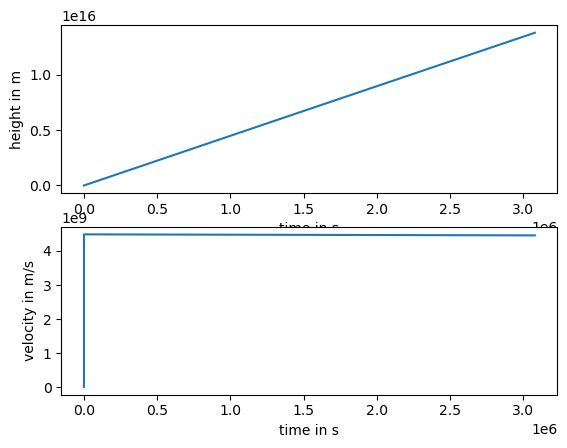

In [109]:
# =============== PLOT THE RESULTS =================
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

axs[0].plot(times, heights)
axs[0].set_xlabel("time in s")
axs[0].set_ylabel("height in m")
axs[1].plot(times, velocities)
axs[1].set_xlabel("time in s")
axs[1].set_ylabel("velocity in m/s")

TYPE YOUR ANALYSIS OF THE SIMULATION IN THIS BOX:

double click to type here

2) top speed v = -378 m/s
3) $k_{parachute}$ = 13
4) hoe kleiner dt hoe accurater de meting, want je checkt dan meer tijdstappen.